<a href="https://colab.research.google.com/github/nilirias/MachineLearning/blob/main/Introduction_to_Logistic_Regression_(Students).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Logistic Regression
## Practical Lab

## **Foreword**
Hi there!

Despite this lab being an introduction to Logistic Regression, it relies on Python heavily. Therefore, here is a piece of advice -- **documentation is your best friend!** Next, you go to **Google** and **Stack Overflow** or other boards.

*A properly formulated Google search query can save you tons of time.*

There are no overly complicated Python concepts in here like OOP or even loops are rare if any. Yet, you are free to use whatever methods, functions and libraries you want to reach the result.

Tips and suggestions for the libraries will be provided. Additional **HINTS** may be found throughout the lab.

Good luck!

Of course, the idea is to use Scikit-learn -- a machine learning library, which makes doing Logistic Regression easy. However, before that, you would need to prepare the data and visualize it.

**(You can use whatever libraries you are comfortable with. The list below is just a recommendation.)**

For this we would use the following libraries:

- `pandas` for building dataframes from .csv files and data manipulation
- `numpy` for working with arrays and matrices
- `matplotlib` as the backend for data visualization
- `seaborn` as the frontend for data visualization
- `scikit-learn` a.k.a. `sklearn` for machine learning

In [ ]:
# Import the above-mentioned libraries following the convention naturally you can tweak these imports to your own preference
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Now below you see a table you will be working with. However, this table is in Markdown and you cannot manipulate it  in Python directly. For this you are provided with a .csv file called `Data1.csv` which will help you to build the same dataframe using `pandas`.

|Person|Income |Sex|Buy|
|------|-------|---|---|
|1     | 2,530 |0  |1  |
|2     | 2,370 |1  |0  |
|3     | 2,720 |1  |1  |
|4     | 2,540 |0  |0  |
|5     | 3,200 |1  |1  |
|6     | 2,940 |0  |1  |
|7     | 3,200 |0  |1  |
|8     | 2,720 |1  |1  |
|9     | 2,930 |0  |1  |
|10    | 2,370 |0  |0  |
|11    | 2,240 |1  |1  |
|12    | 1,910 |1  |1  |
|13    | 2,120 |0  |1  |
|14    | 1,830 |1  |1  |
|15    | 1,920 |1  |1  |
|16    | 2,010 |0  |0  |
|17    | 2,010 |0  |0  |
|18    | 2,230 |1  |0  |
|19    | 1,820 |0  |0  |
|20    | 2,110 |0  |0  |
|21    | 1,750 |1  |1  |
|22    | 1,460 |1  |0  |
|23    | 1,610 |0  |1  |
|24    | 1,570 |1  |0  |
|25    | 1,370 |0  |0  |
|26    | 1,410 |1  |0  |
|27    | 1,510 |0  |0  |
|28    | 1,750 |1  |1  |
|29    | 1,680 |1  |1  |
|30    | 1,620 |0  |0  |


## Load data from CSV file

Now use `pd.read_csv()` function to read the csv into the pandas dataframe. Please, refer to `pandas` documentation if needed or here is the link to [`read_csv()` function documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). 

Call your dataframe `df`.

*Bonus task: Try to make the first column into the index column when importing.*

In [ ]:
# YOUR CODE HERE
df = pd.read_csv('Data1.csv')

Double-click **here** for the solution.

<!-- Your answer is below:
    
df = pd.read_csv("Data1.csv", index_col=0)

-->

In [ ]:
# check the resulting data frame and its first 5 rows
df.head()

,Person,Income,Sex,Buy
0,1,"2,530",0,1
1,2,"2,370",1,0
2,3,"2,720",1,1
3,4,"2,540",0,0
4,5,"3,200",1,1


You should see a dataframe that looks similar to this one below.

|   Person | Income   |   Sex |   Buy |
|---------:|:---------|------:|------:|
|        1 | 2,530    |     0 |     1 |
|        2 | 2,370    |     1 |     0 |
|        3 | 2,720    |     1 |     1 |
|        4 | 2,540    |     0 |     0 |
|        5 | 3,200    |     1 |     1 |

## Data Pre-Processing

Now that we imported the data, let's check its types.

At this point you would probably see that the column **Income** has data formatted as strings or *objects*.
However, for our calculations we would need these columns to be formatted as:

- Income --> float64
- Sex --> int64 (in the lecture the term 'gender' was used.)
- Buy --> int64

In [ ]:
#displays types of data in each column
df.dtypes

Person     int64
Income    object
Sex        int64
Buy        int64
dtype: object

<div class="alert alert-block alert-warning">
    <b>As this type of thing is not really a purpose of this lab, feel free to use the solution below.
</div>

Otherwise, here is the hint:
- use dataframe filtering and selection to re-assign the values in the column like this:

  ```python
  df['Income'] = df['Income'] * 3 
                    #it will multiply all income values (if numbers) by three (works differently for strings)
  ```
  
- the numbers in the Income column (which are currently strings) have blank spaces on both sides of them. [This one](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html) might be helpful.
- to convert strings to floats we need to replace ',' (commas) with a '.' (dot). For this [`pandas apply`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html), `lambda` and `.replace()` can help.
- finally [`pandas astype`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) can finish the process

In [ ]:
#YOUR CODE HERE
df['Income'] = df['Income'].str.strip().str.replace(",",".") #df['Income'] = df['Income'].fillna(0).astype(np.float) 
df['Income'] = df['Income'].astype(float)
df.dtypes

Person      int64
Income    float64
Sex         int64
Buy         int64
dtype: object


Double-click **here** for the solution.

<!-- Your answer is below:
    
df['Income'] = df['Income'].str.strip()
df['Income'] = df['Income'].apply(lambda x: x.replace(',','.'))
df['Income'] = df['Income'].astype(float)

-->

## Creating placeholder for y-intercept

Now we need to create a placeholder for y-intercept. For this we add a new column called **int** to our dataframe and assign it a value of 1.

This is absolutely needed to get the reuired solutions if using `scikit learn` later on!

In [ ]:
df['int'] = 1

In [ ]:
df.head()

,Person,Income,Sex,Buy,int
0,1,2.53,0,1,1
1,2,2.37,1,0,1
2,3,2.72,1,1,1
3,4,2.54,0,0,1
4,5,3.20,1,1,1


## Data Visualization

### Task 1

Now, please, create a scatter plot of our data. Display *Income* on the x-axis and *Buy* on y-axis.

**HINT:** The easiest way to do it is to use [`pandas plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

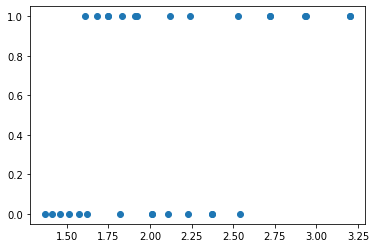

In [ ]:
#YOUR CODE HERE - option 1
import matplotlib
matplotlib.pyplot.scatter(x = df['Income'], y = df['Buy'])

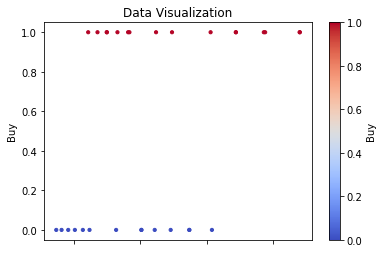

In [ ]:
#YOUR CODE HERE - option 2
df.plot.scatter(x = 'Income', y = 'Buy', s = 10, c = 'Buy', cmap = 'coolwarm', xlabel = 'Income' ,ylabel='Buy', title='Data Visualization')

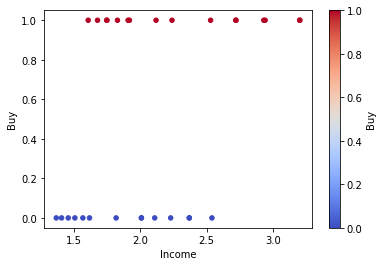

In [ ]:
# Answer provided
fig, ax = plt.subplots()
df.plot(kind='scatter', x="Income", y="Buy", c="Buy", cmap="coolwarm", ax=ax)

Double-click **here** for the solution.

<!-- Your answer is below:
    
fig, ax = plt.subplots()
df.plot(kind='scatter', x="Income", y="Buy", c="Buy", cmap="coolwarm", ax=ax)

-->

## Data Selection

The final stage of data preparation is to select the data to teach the model. We need to create the `numpy` arrays for the independent variables and the dependent variable.

We will use [`numpy.asarray()`](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html) for this.

By convention we call the arrays:

- X --> for independent variables (Note: the 'x' is a capital 'X')
- y --> for dependent variables (Note: the 'y' is lower case 'y')

<div class="alert alert-block alert-danger">
    <b>We need to include `int` column in our 'X' array so it becomes a feature for our LogReg
</div>

In [ ]:
df.head()

,Person,Income,Sex,Buy,int
0,1,2.53,0,1,1
1,2,2.37,1,0,1
2,3,2.72,1,1,1
3,4,2.54,0,0,1
4,5,3.20,1,1,1


In [ ]:
#Independent vars. Don't forget to also consider int column
# X = np.asarray(df[['Person', 'Income', 'Sex', 'int']])
X = np.asarray(df[['Income', 'int']])

In [ ]:
#Dependent vars
y = np.asarray(df['Buy'])

Double-click **here** for the solution.

<!-- Your answer is below:
    
X = np.asarray(df[['Income', 'int']])
y = np.asarray(df['Buy'])

-->

Note: Also, usually we want to do some pre-processing with our data and normalize it. Then we usually divide it into test-train-cv sets, etc. **Here we do not do this to keep things simple**.

## Modeling. Creating Logistic Regression

### Tasks 2 and 3

Phew, finally, having all the data ready, we can use scikit-learn to built the Logistic Regression itself!
It is highly advised that you go into [the documentation of the Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and give it a read.
When you are done --> import it!

In [ ]:
#import the Logistic Regression
from sklearn.linear_model import LogisticRegression

Double-click **here** for the solution.

<!-- Your answer is below:
    
from sklearn.linear_model import LogisticRegression

-->

Now let's create a Logistic Regression object. You can give it any name, but the defualt one we are going to use will be `logreg`.

<div class="alert alert-block alert-danger">
    <b>You need to pass the following paramaters to logreg if you are using scikit-learn:
        <ul>C=1e9</ul>
        <ul>fit_intercept=False</ul>
    </b>
</div>

In [ ]:
#create the Logistic Regression object and assign it to the variable logreg
logreg = LogisticRegression(C=1e9, fit_intercept=False)

Double-click **here** for the solution.

<!-- Your answer is below:
    
logreg = LogisticRegression(C=1e9, fit_intercept=False)

-->

Now *fit* our model according to the training data using the appropriate method of the Logistic Regression. Refer to [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) if needed.

In [ ]:
#YOUR CODE HERE
logreg.fit(X,y)

LogisticRegression(C=1000000000.0, fit_intercept=False)

Double-click **here** for a **HINT**.

<!-- Your answer is below:
    
Have a look at the `fit()` method. (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit)

-->

---------------------------

Double-click **here** for the solution.

<!-- Your answer is below:
    
logreg.fit(X, y)

-->

Having our model trained we can now do some *predictions*! Create a new variable `y_pred` which will hold an array of our predicted labels. Obviously, you would also need to creat that array with *predictions* and assign it to `y_pred`.
Perhaps, you can find more answers in the documentation ;)

In [ ]:
#YOUR CODE HERE
y_pred = logreg.predict(X)

Double-click **here** for a **HINT**.

<!-- Your answer is below:
    
Have a look at the `predict()` method. (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict)

-->

-----------------------

Double-click **here** for the solution.

<!-- Your answer is below:
    
y_pred = logreg.predict(X)

-->

#### Task 2

Now, using the attributes of Logistic Regression scikit-learn object you should be able to see its coefficients.
Look for the appropriate attribute in [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [ ]:
#print the coefficients here
#print(logreg.coef_.T)
print(f"The intercept is {round(logreg.coef_[0][1],3)} and the coefficient is: b1={round(logreg.coef_[0][0],3)}.")

The intercept is -3.671 and the coefficient is: b1=1.827.


Double-click **here** for the solution.

<!-- Your answer is below:
    
logreg.coef_.T

Or a fancier way is:

print(f"The intercept is {round(logreg.coef_[0][1],3)} and the coefficient is: b1={round(logreg.coef_[0][0],3)}.")

-->

#### Task 3

Use the [`seaborn.regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) to visualize the data and *estimated* Logistic Regression curve.

**NOTE:** You are visualizing the data you have, not the model you just made. Make sure to fill in x and y values correctly.

As we are dealing with the Logistic Regression, make sure you have `logistic=True` in your regplot.

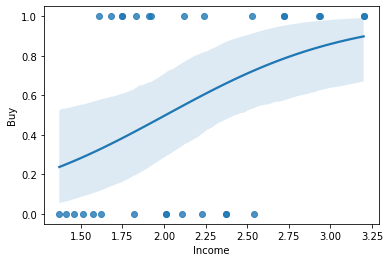

In [ ]:
#YOUR REGPLOT HERE - just taking 2 values
sns.regplot(x = 'Income', y = 'Buy', data = df, logistic = True)

Double-click **here** for the solution.

<!-- Your answer is below:
    
sns.regplot(x='Income', y='Buy', data=df, logistic=True)
plt.xlim(1, 4)

-->

## Estimating probabilities

### Task 4

Next, we want to see the decision process of our model. We know that the decision threshold is set by default to 0.5 which mean that predicted probabilities lower than the threshold would result in a label of 0. On the other hands, probabilities above 0.5 would result in a label of 1.

Your task is to find this probabilities, display them as an array and, finally, create a copy of an initial dataframe and add the estimated probabilities to it along with the predicted labels.

As always, [Logistic Regression scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) might be helpful!

TIP: If you use a clever way to get estimated probabilities, make sure to select the second column of the array which indicates the probability of the labels being equal to 1. Use slicing for this.

TIP 2: use [`pandas.DataFrame.copy`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) to create a copy of an initial dataframe `df`. Make sure to [drop the column `int`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) from it for now.

In [ ]:
#create an array of predicted probabilities
logreg.predict_proba(X)[:,1]

'''
- Predict_proba = returns the probability estimates only
- Predict_log_proba = returns the logarithmic of the probability estimates
'''

array([0.72152117, 0.65918688, 0.78569722, 0.72517757, 0.89809385,
       0.84568599, 0.89809385, 0.78569722, 0.84328643, 0.65918688,
       0.60399544, 0.45491664, 0.55054693, 0.41897123, 0.45945103,
       0.50047306, 0.50047306, 0.59961693, 0.41452998, 0.54602164,
       0.38386588, 0.26834214, 0.3254197 , 0.30958467, 0.23730801,
       0.25078902, 0.28665377, 0.38386588, 0.3540982 , 0.32944345])

Double-click **here** for a **HINT**.

<!-- Your answer is below:
    
Have a look at the `predict_proba()` method. (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba)

-->

----------------------

Double-click **here** for the solution.

<!-- Your answer is below:
    
logreg.predict_proba(X)[:,1]

-->

In [ ]:
#Create a copy of an array df and call it however you want. we will assume you called it vf for the sake of simplicity
vf = df.copy()
vf.drop(['int'], axis=1, inplace=True)
vf.head()

,Person,Income,Sex,Buy
0,1,2.53,0,1
1,2,2.37,1,0
2,3,2.72,1,1
3,4,2.54,0,0
4,5,3.20,1,1


Double-click **here** for the solution.

<!-- Your answer is below:
    
vf = df.copy()
vf.drop(['int'], axis=1, inplace=True)
vf.head()

-->

Now add the estimated probabilities and labels to this copy. We suggest you call columns `Estimate` and `Forecast` respectively.

In [ ]:
#YOUR CODE HERE
vf['Estimate'] = logreg.predict_proba(X)[:,1]
vf['Forecast'] = round(vf['Estimate'])
vf.head()

,Person,Income,Sex,Buy,Estimate,Forecast
0,1,2.53,0,1,0.721521,1.0
1,2,2.37,1,0,0.659187,1.0
2,3,2.72,1,1,0.785697,1.0
3,4,2.54,0,0,0.725178,1.0
4,5,3.20,1,1,0.898094,1.0


You should get a dataframe which looks like this when you use `.head()`.

|   Person |   Income |   Sex |   Buy |   Estimate |   Forecast |
|---------:|---------:|------:|------:|-----------:|-----------:|
|        1 |     2.53 |     0 |     1 |   0.721521 |          1 |
|        2 |     2.37 |     1 |     0 |   0.659187 |          1 |
|        3 |     2.72 |     1 |     1 |   0.785697 |          1 |
|        4 |     2.54 |     0 |     0 |   0.725178 |          1 |
|        5 |     3.2  |     1 |     1 |   0.898094 |          1 |

## CM

### Tasks 5 and 6

Having this dataframe you should be able to fill the table below with your own values. The table is in Markdown, so to edit it you would need to double-click it and after changes are done -- just run the cell.

Refer to [this link](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) if needed to get the idea what TNR, TPR and Accuracy are.

Naturally, you can manually calculate the values for this table, but there are ways to do it smarter. We encourage you to think about it on your own.

**HINT:** One of the ways is to use dataframe filtering and `len()` function.

**HINT 2:** `pandas` can perform a lot of operations on the dataframe like `.sum()`, `.mean()`, as well as many common mathematical operations etc. Search the documentation for what you might need.

**HINT 3:** `.loc()` and `.iloc()` methods can come really handy.

| Group | 0=NB Forescast | 1=Buy Forecast | Total | Percentage of correct prognoses | Measures                 |
|-------|----------------|----------------|-------|---------------------------------|--------------------------|
| 0=NB  |                |                |       |                                 | True Negative Rate (TNR) |
| 1=Buy |                |                |       |                                 | True Positive Rate (TPR) |
| Total |                |                |       |                                 | Accuracy                 |

In [ ]:
#YOUR CODE HERE 
'''
AUC: Area Under the Curve 
true positive (TP): A test result that correctly indicates the presence of a condition or characteristic
true negative (TN): A test result that correctly indicates the absence of a condition or characteristic
false positive (FP): A test result which wrongly indicates that a particular condition or attribute is present
false negative (FN): A test result which wrongly indicates that a particular condition or attribute is absent
true negative rate (TNR):
true positive rate (TPR):
Accuracy (ACC)'''

df = pd.DataFrame(columns = ['Group', '0=NB Forescast', '1=Buy Forecast','Total', 'Percentage of correct prognoses', 'Measures'])


[[7 7]
 [7 9]]

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        14
           1       0.56      0.56      0.56        16

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.53        30
weighted avg       0.53      0.53      0.53        30



In [ ]:
from sklearn.metrics import confusion_matrix  #to create a rough confusion matrix
from sklearn.metrics import classification_report #to get a nice-looking report with everything in it 

print(confusion_matrix(y, y_pred))
print()
print(classification_report(y, y_pred))

[[7 7]
 [7 9]]

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        14
           1       0.56      0.56      0.56        16

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.53        30
weighted avg       0.53      0.53      0.53        30



Double-click **here** for a **HINT** on mathematics behind this.

<!-- You can use the following table to get a hint on how to calculate the values. Just paste this table into a Markdown cell and run it:
    
| Group | 0=NB Forescast | 1=Buy Forecast | Total | Percentage of correct prognoses | Measures                 |
|-------|----------------|----------------|-------|---------------------------------|--------------------------|
| 0=NB  |       n00      |       n01      |   n0  |              n00/n0             | True Negative Rate (TNR) |
| 1=Buy |       n10      |       n11      |   n1  |              n11/n1             | True Positive Rate (TPR) |
| Total |                |                |   n   |           (n00+n11)/n           | Accuracy                 |

-->

Double-click **here** for a **HINT** on a long, but straightforward coding approach.

<!-- Your answer is below. This way it filters the dataframe where both values in the 'Buy' and 'Forecast' columns are equal to zero. Just play with numbers to make it work for you.
    
len(vf[(vf["Buy"]==0) & (vf["Forecast"]==0)]

-->

Double-click **here** for a **HINT** regarding smarter approach.

<!-- Your answer is below:

Perhaps scikit-learn has some metrics (https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics) that could help you?

-->

---------------------------

Double-click **here** for the smart solution.

<!-- Your answer is below:
    
from sklearn.metrics import confusion_matrix  #to create a rough confusion matrix
from sklearn.metrics import classification_report #to get a nice-looking report with everything in it 

print(confusion_matrix(y, y_pred))
print()
print(classification_report(y, y_pred))

-->

## Metrics

#### Task 6

Reaching this point of the lab, you have probably found out that there packages which simplify a lot of mundane things for Data Scientists. For example, [scikit-learns metrics](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics) is something that helps to evaluate a model in a quick and simple way.

Your next task is visualize the confusion matrix using scikit-learn's [`plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

HINT: Use `display_labels` parameter.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


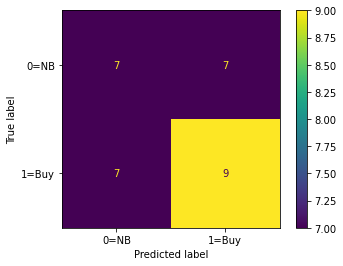

In [ ]:
#YOUR CODE HERE
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X, y, display_labels=["0=NB", "1=Buy"])

Double-click **here** for the solution.

<!-- Your answer is below:
    
plot_confusion_matrix(logreg, X, y, display_labels=["0=NB", "1=Buy"])

-->

### ROC and AUC

#### Task 7

To plot a ROC curve and get an AUC score you would need to refer to [metrics](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics) as well. Try to find the appropriate functions on your own.

In [ ]:
#ROC and AUC


Double-click **here** for a **HINT**.

<!-- Your answer is below:
    
Have a look at `roc_curve()` and `roc_auc_score()` methods.

-->

----------------------

Double-click **here** for the solution.

<!-- Your answer is below:
    
y_pred_prob = logreg.predict_proba(X)[:,1]
fpr, tpr , threshold = roc_curve(y, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlabel("False buy forecast (1 - TNR)")
plt.ylabel("Correct buy forecast (TPR)")

auc = roc_auc_score(y, y_pred_prob)
print(f"AUC:{round(auc, 2)}")

-->

------------------------------------

## Logistic Regression with multiple features

### Task 8

Well now, you would have to perform mostly the same steps, but now you would take persons' gender into consideration.

If you think about it, you were working with multiple variables before as we introduced `int` column in the previous example. Now, **you would also need to consider an 'int' column**, but also this time the `Sex` column as well (basically, your `X` array should have three columns included: 'Income', 'Sex, 'int').

Repeat the same steps while taking gender into the account:

1. Create `X` (or call it differently to keep the original X array intact) array with features
2. Create `y` (or call it differently to keep the original y array intact) array with labels
3. Create `LogisticRegression` object with parameters (C=1e9, fit_intercept=False)
4. Fit the data into the model
5. Make predictions
6. Plot the estimated logistic curves for men and women on one graph
7. Determine the coefficients (there will be one more now!)
8. Find the values of the confusion matrix and plot it
9. Get the classification report
10. Plot a ROC curve and get a new AUC score

In [ ]:
#YOUR CODE HERE
#Feel free to insert more cells if you need any


### Task 9

For the visualization, please, use [`seaborn.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) this time.
Set `hue='Sex'` and `legend=False`. In the new line (not cell) type this:
```python
plt.legend(title='Sex', loc='lower right', labels=['Woman', 'Man'])
```

If you are having any warnings but the graph is displayed correctly nonetheless -- it's okay!

Double-click **here** for the solution.

<!-- Your answer is below:
    
sns.lmplot(x='Income', y='Buy', data=df, logistic=True, hue='Sex', legend=False)
plt.xlim(1, 4)
plt.legend(title='Sex', loc='lower right', labels=['Woman', 'Man'])

-->

----------------------------------------------------------

## Final task

### Task 10

The task is simple. You have been given the data of two more people. Use any means and, preferably, your model to predict whether they will likely buy the butter or not!

| Person | Income | Sex | Buy forecast |
|--------|:------:|:---:|:------------:|
| Alex   |  1.57  |  1  |       ?      |
| Sandra |  2.92  |  0  |       ?      |

In [ ]:
#YOUR CODE HERE


## The end!

At this point you have reached the end of this lab! Congratulations! We hope it was not too hard, but, honestly, it was pretty hard for people who don't have too much experience in Python and Data Science. So, if you found it difficult and had to use tips or solutions -- it's completely fine! As long, as you were doing your best, you did a great job!

However, feel free to give us feedback on how to improve this lab. Thank you!